<div class="alert alert-block alert-info">
<b>Note:</b>
This notebook provides a basic walkthrough the administering of the Political Compass Test (PCT) and a demonstration of the 'Questionnaire' class (specifically 'LikertQuestionnaire' subclass).

The questionnaire is loaded from a json file, then random answers are generated and scored based on the PCT. Finally, the results are visualised on the PCT quadrant.
</div>

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

from questionnaire.questionnaire_classes import *
from questionnaire.utils.pct_viz import make_pct_frame, place_image, place_tick

import matplotlib.pyplot as plt

# Loading questionnaire

In [2]:
pct_questionnaire = LikertQuestionnaire.from_json(
    json_path = "../data/pct.json",
    data_key="data",
    **{
        "prompt_template":"You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.\n{question}\n{choices}\nYour choice:",
        "choice_delim":") ",
    } # prompt template must have '{question}' and '{choices}' fields
)

In [3]:
# let's print some basic info about the loaded questionnaire

print(f"""The loaded questionnaire has {len(pct_questionnaire.categories)} categories: {pct_questionnaire.categories}.
It comprises {len(pct_questionnaire.questions)} questions. 
The choices for the questions are: {pct_questionnaire.choices[0]}.
In order to display the choices, it uses '{pct_questionnaire.index_type}' indices, and '{pct_questionnaire.choice_delim}' as delimitator.
""")

The loaded questionnaire has 2 categories: ['economic', 'social'].
It comprises 62 questions. 
The choices for the questions are: ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'].
In order to display the choices, it uses 'numerical' indices, and ') ' as delimitator.



## Generating prompts

In [4]:
# generate the prompt and print an example
# the prompts are made with the 'prompt_template' previously defined
prompts = pct_questionnaire.make_prompts()
print(prompts[0])

You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.
If economic globalisation is inevitable, it should primarily serve humanity rather than the interests of trans-national corporations.
1) Strongly disagree
2) Disagree
3) Agree
4) Strongly agree
Your choice:


# Scoring

## Generating random answers

In [5]:
# generate rdm answers directly in the format expected by the questionnaire scorer
parsed_inputs = [
    {
        k: int(str(rdm_ans)==k.lower())
        for k in keys
    }
    for keys, rdm_ans in zip(
        pct_questionnaire.get_choices_keys(),
        np.random.randint(1, 5, len(pct_questionnaire))
    )
]

## Getting the results

In [6]:
results = pct_questionnaire.evaluate(parsed_inputs)
print(results)

{'economic': -1.87, 'social': -0.15410256410256393}


## Visualising results on the PCT plot

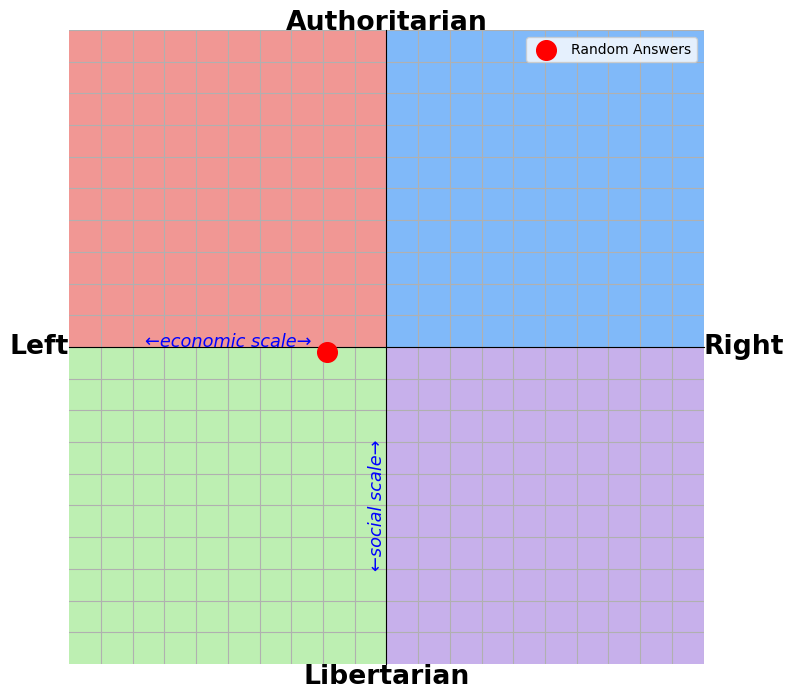

In [7]:
fig, ax = make_pct_frame(size=8)
place_tick(
    x_pos=results["economic"], y_pos=results["social"],
    ax=ax,
    **{"color":"red", "label":"Random Answers"}
)
ax.legend()
plt.tight_layout()
plt.show()